<a href="https://colab.research.google.com/github/gusper01/tfi_itba/blob/main/Notebooks/TFI_NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scraping Guías de Supervisión BCRA

En las siguientes urls: se encuentran publicadas las guías

https://www.bcra.gob.ar/SistemasFinancierosYdePagos/CiberSeguridad-y-Ciberresilencia.asp
https://www.bcra.gob.ar/SistemasFinancierosYdePagos/gestion-de-continuidad-del-negocio.asp
https://www.bcra.gob.ar/SistemasFinancierosYdePagos/gestion-de-tecnologia-informatica.asp
https://www.bcra.gob.ar/SistemasFinancierosYdePagos/Identificaci%C3%B3n-digital.asp
https://www.bcra.gob.ar/SistemasFinancierosYdePagos/infraestructuras-del-mercado-financiero.asp
https://www.bcra.gob.ar/SistemasFinancierosYdePagos/prevencion-de-perdida-de-informacion.asp



In [ ]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=f34a9e8e82ebac92e85b698c5be5674ce46e95dd7f8dbf41fe822cee924dfcd7
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [1]:
! git clone https://github.com/gusper01/tfi_itba

Cloning into 'tfi_itba'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 209 (delta 40), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (209/209), 14.81 MiB | 29.11 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [ ]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
import stanza
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import req
from bs4 import BeautifulSoup
import re
import pandas as pd 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
urldata = "https://raw.githubusercontent.com/gusper01/tfi_itba/main/Datasets/dftextos2P.csv"
dftext = pd.read_csv(urldata)
dftext

,Unnamed: 0,Area,Archivo,T.Tokenizado,T.Tokenizado s/ StopWords,T3,TU3,T,TU
0,0,SGMP,t-snp-tr-nc,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSF...","['ultima', 'comunicacion', 'incorporada', 'tex...",18,3,4133,1156
1,1,SGMP,t-SNP-tr,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSF...","['ultima', 'comunicacion', 'incorporada', 'tex...",40,17,7483,1444
2,2,SGMP,t-snp-spd,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'SERVIC...","['ultima', 'comunicacion', 'incorporada', 'tex...",17,6,2106,775
3,3,SGR,t-req-si,"['REQUISITOS', 'OPERATIVOS', 'MINIMOS', 'DEL',...","['ultima', 'comunicacion', 'incorporada', 'tex...",3,3,2399,929
4,4,SGR,t-reqcac,"['REQUISITOS', 'OPERATIVOS', 'MINIMOS', 'DE', ...","['ultima', 'comunicacion', 'incorporada', 'tex...",3,3,1704,748
5,5,SGR,t-rmsist,"['REQUISITOS', 'MINIMOS', 'DE', 'GESTION', 'IM...","['ultima', 'comunicacion', 'incorporada', 'tex...",235,22,17086,2844
6,6,SGMP,t-snp-psp,"['PROVEEDORES', 'DE', 'SERVICIOS', 'DE', 'PAGO...","['ultima', 'comunicacion', 'incorporada', 'tex...",12,4,1586,698
7,7,SGR,t-pusf,"['PROTECCION', 'DE', 'LOS', 'USUARIOS', 'DE', ...","['ultima', 'comunicacion', 'incorporada', 'tex...",14,4,6668,1876
8,8,SGMP,t-pimf,"['PRINCIPIOS', 'PARA', 'LAS', 'INFRAESTRUCTURA...","['ultima', 'comunicacion', 'incorporada', 'tex...",13,6,4780,1510
9,9,SGMP,t-rrci,"['LINEAMIENTOS', 'PARA', 'LA', 'RESPUESTA', 'Y...","['rrci', 'ultima', 'comunicacion', 'incorporad...",2,1,1964,859


# Scraping de Documentos

In [ ]:
##Scraping de Documentos 
urls = (['https://www.bcra.gob.ar/SistemasFinancierosYdePagos/CiberSeguridad-y-Ciberresilencia.asp', 
         'https://www.bcra.gob.ar/SistemasFinancierosYdePagos/gestion-de-continuidad-del-negocio.asp', 
         'https://www.bcra.gob.ar/SistemasFinancierosYdePagos/gestion-de-tecnologia-informatica.asp',
         'https://www.bcra.gob.ar/SistemasFinancierosYdePagos/Identificaci%C3%B3n-digital.asp',
         'https://www.bcra.gob.ar/SistemasFinancierosYdePagos/infraestructuras-del-mercado-financiero.asp',
         'https://www.bcra.gob.ar/SistemasFinancierosYdePagos/prevencion-de-perdida-de-informacion.asp',
         ])

def extract_content(url, soup): 
	return { 
		"url": url, 
		"title": soup.title.string, 
		"h1": soup.find("h1").text, 
	} 


dependencia = (['GAES','GAES', 'GAES','GAES','GAES','GAES'])
nombre = (['ciberseg','continuidad','gestionIt','idDigital','imfs','Dlp'])
pagina = []
texto = []
div = []
sinHtml = []
indice = 0
colu = ('Area','Archivo','Texto', 'DIV', 'sinHtml')


for enlace in urls:
#  pagina.append(requests.get(enlace))
 response = requests.get(enlace)
# soup = BeautifulSoup(response.text, 'lmxl')
 soup = BeautifulSoup(response.text, 'html.parser')
   
 #pagina.append(extract_content(url, soup))
 #pagina.append(soup)
 texto.append(soup)
 div.append(soup.find("div", {"class": "contenido"}))
 sinHtml.append(div[indice].get_text())
 indice = indice + 1
#for pag in pagina:
#  texto.append(BeautifulSoup(pag.text,'lmxl'))

#print(pagina)
dftextosG = pd.DataFrame(list(zip(dependencia,nombre,texto,div,sinHtml)), columns= colu )
dftextosG

,Area,Archivo,Texto,DIV,sinHtml
0,GAES,ciberseg,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuías de supervisión para la Cibersegu...
1,GAES,continuidad,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuía de Supervisión de Gestión de Cont...
2,GAES,gestionIt,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuía de Supervisión de Gestión de Tecn...
3,GAES,idDigital,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuías de supervisión. Identificación d...
4,GAES,imfs,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuía de Supervisión de Infraestructura...
5,GAES,Dlp,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuía de Supervisión de Prevención de P...


# Limpieza de Textos

In [ ]:
# Chequeo de contenido

dftextosG.loc[0, 'sinHtml']
#dftextosG.loc[1, 'sinHtml']
#dftextosG.loc[2, 'sinHtml']

'\n\n\n\nGuías de supervisión para la Ciberseguridad y Ciberresiliencia\nLos procedimientos de supervisión estarán destinados a determinar la implementación de controles que permitan a las entidades financieras una adecuada gestión de la ciberseguridad y la ciberresiliencia. Entre otros aspectos, se evaluarán: \nEstructura, roles y responsabilidades:\n\x95\tLa existencia de roles y funciones vinculadas a la gestión de la ciberseguridad/ciberresiliencia a fin de minimizar los impactos negativos de los ciberataques reales o futuros. \r\n\r\n\t\t\t\t\x95\tLa participación en el Comité de Tecnología Informática, del responsable de la gestión de la ciberseguridad/ciberresiliencia. \nEstrategia, políticas, normas y procedimientos:\n\x95\tLa existencia de una estrategia de ciberseguridad/ciberresiliencia que permita en forma coordinada y metodológica anticiparse, resistir, recuperarse y evolucionar frente a las ciber-amenazas. \r\n\r\n\t\t\t\t\x95\tEn la gestión de riesgos, la incorporación e

In [ ]:
# Funciones Limpiar texto
def borra_tilde(text):
	tildes = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'Á': 'A', 'E': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U' }
	for tilde in tildes:
		if tilde in text:
			text = text.replace(tilde, tildes[tilde])
	return text

# Se evaluaron expresiones regulares para reemplazar numeros y caracteres especiales
# Se dejan solo letras incluida la ñ el guion (-) y el salto de linea (\n) el resto se 
# reemplaza con espacios (" ")
#text4b = re.sub("[^a-zA-Z-ñ\n]"," ",text2)
#re.sub('[^a-zA-Z-ñ\n" "]', ' ', text4)
def clean1(text2):
  return re.sub("[^a-zA-Z-ñ'-'\n]"," ",text2)


#elimino guion (-) seguido de saltos de linea, 
# uno o varios(\n) para evitar truncar palabras
#text4c1 = re.sub(r"a-zA-Z-ñ'-'a-zA-Z-ñ"," ",text4b)
#text4c = re.sub(r"-\n+'\'\n*-","",text4b)
# esta va !!!text4c = re.sub(r"-\n*-*","",text4b)
#text4c =  re.sub(r"-\n+","",text4c2)
#text4 = re.sub(r"[^a-zA-Zñ\' '\'\n']","",text4b)
def clean2(text4b):
  return re.sub(r"-\n*-*","",text4b)

# Regex para eliminar caracteres especiales, viñetas, etc
# Elimino todo excepto letras y saltos de linea
# esta va !! text4 = re.sub(r"[^a-zA-Zñ\' '\'\n']","",text4c)
# Abajo Reemplazo x espacio!!!
#text4 = re.sub('[^a-zA-Zñ]', ' ', text2)
def clean3(text4c):
  return re.sub(r"[^a-zA-Zñ\' '\'\n']","",text4c)

# Regex para eliminar caracteres especiales, viñetas, etc 
# saltos de linea inclusive \n ¯\_(ツ)_/¯
#text5 = re.sub('[^a-z]', ' ', text2)  ..OJO elimina la primer letra en mayuscula
# la ultima 29/11/2022 text5 = re.sub('[^a-zA-Z-ñ]', ' ', text4)
def clean4(text4):
  return re.sub('[^a-zA-Z-ñ]', ' ', text4)

def remove_extra_whitespaces(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

def rutina_clean(text):
  text2 = borra_tilde(text)
  text3 = clean1(text2) 
  text4 = clean2(text3)
  text5 = clean3(text4)
  text5c = clean4(text5)
  text6 = remove_extra_whitespaces(text5c) 
  return text6

In [ ]:
dftextosG['TextoL'] = dftextosG['sinHtml'].apply(rutina_clean)
#chequeo dftextosG 
dftextosG.loc[5,"TextoL"]



'Guia de Supervision de Prevencion de Perdida de Informacion DLP Se entiende por prevencion de perdida de informacion DLP al conjunto de herramientas tecnologicas y procesos destinados a la deteccion proteccion supervision y administracion de la informacion sensible con el fin de evitar que la misma sea accedida por personal no autorizado Los procedimientos de supervision estaran destinados a determinar la implementacion de controles que permitan a las entidades contar con un adecuado marco conceptual para la prevencion de perdida de informacion Entre otros aspectos se evaluaran Aspectos Generales La existencia de politicas que determinen pautas de contratacion desvinculacion y acuerdos de confidencialidad de la informacion con el personal y entes proveedores de servicios de la organizacion aun despues de no formar parte de la misma La aplicacion de una clara definicion y comunicacion de las politicas de seguridad y acuerdos de confidencialidad aceptados y firmados por todas las person

#Prueba con una URL

In [ ]:
# Se realiza el scrapping con una url.
# Como son pocas se considera no usar un bucle para generar todas los archivos de texto 
url = 'https://www.bcra.gob.ar/SistemasFinancierosYdePagos/CiberSeguridad-y-Ciberresilencia.asp'
pagina = requests.get(url)

In [ ]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(pagina.text, 'lxml')
soup

In [ ]:
# Obtain information from tag <div>
# Se busca el div "class: contenido" donde se encuentra 
#el texto de la guia de supervision 
div = soup.find("div", {"class": "contenido"})
div

In [ ]:
# Se eliminan los tags HTML 
text1 = div.get_text()
print(text1)
# table1





Guías de supervisión para la Ciberseguridad y Ciberresiliencia
Los procedimientos de supervisión estarán destinados a determinar la implementación de controles que permitan a las entidades financieras una adecuada gestión de la ciberseguridad y la ciberresiliencia. Entre otros aspectos, se evaluarán: 
Estructura, roles y responsabilidades:
	La existencia de roles y funciones vinculadas a la gestión de la ciberseguridad/ciberresiliencia a fin de minimizar los impactos negativos de los ciberataques reales o futuros. 

					La participación en el Comité de Tecnología Informática, del responsable de la gestión de la ciberseguridad/ciberresiliencia. 
Estrategia, políticas, normas y procedimientos:
	La existencia de una estrategia de ciberseguridad/ciberresiliencia que permita en forma coordinada y metodológica anticiparse, resistir, recuperarse y evolucionar frente a las ciber-amenazas. 

					En la gestión de riesgos, la incorporación e identificación de amenazas y vulnerabilidades

In [ ]:
# Funcion para eliminar tildes
def borra_tilde(text):
	tildes = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'Á': 'A', 'E': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U'}
	for tilde in tildes:
		if tilde in text:
			text = text.replace(tilde, tildes[tilde])
	return text

text2 = borra_tilde(text1)
print(text2)





Guias de supervision para la Ciberseguridad y Ciberresiliencia
Los procedimientos de supervision estaran destinados a determinar la implementacion de controles que permitan a las entidades financieras una adecuada gestion de la ciberseguridad y la ciberresiliencia. Entre otros aspectos, se evaluaran: 
Estructura, roles y responsabilidades:
	La existencia de roles y funciones vinculadas a la gestion de la ciberseguridad/ciberresiliencia a fin de minimizar los impactos negativos de los ciberataques reales o futuros. 

					La participacion en el Comite de Tecnologia Informatica, del responsable de la gestion de la ciberseguridad/ciberresiliencia. 
Estrategia, politicas, normas y procedimientos:
	La existencia de una estrategia de ciberseguridad/ciberresiliencia que permita en forma coordinada y metodologica anticiparse, resistir, recuperarse y evolucionar frente a las ciber-amenazas. 

					En la gestion de riesgos, la incorporacion e identificacion de amenazas y vulnerabilidades

In [ ]:
# Regex para eliminar caracteres especiales, viñetas, etc

text3 = re.sub('[^a-zA-Z0-9 \n\.]', ' ', text2)
print(text3)





Guias de supervision para la Ciberseguridad y Ciberresiliencia
Los procedimientos de supervision estaran destinados a determinar la implementacion de controles que permitan a las entidades financieras una adecuada gestion de la ciberseguridad y la ciberresiliencia. Entre otros aspectos  se evaluaran  
Estructura  roles y responsabilidades 
  La existencia de roles y funciones vinculadas a la gestion de la ciberseguridad ciberresiliencia a fin de minimizar los impactos negativos de los ciberataques reales o futuros.  
 
      La participacion en el Comite de Tecnologia Informatica  del responsable de la gestion de la ciberseguridad ciberresiliencia. 
Estrategia  politicas  normas y procedimientos 
  La existencia de una estrategia de ciberseguridad ciberresiliencia que permita en forma coordinada y metodologica anticiparse  resistir  recuperarse y evolucionar frente a las ciber amenazas.  
 
      En la gestion de riesgos  la incorporacion e identificacion de amenazas y vulnerabilid

#Preprocesamiento

In [ ]:
#NLTK uso stop words en spanish
#NLTK agrego custom stop words en spanish

stopwords = nltk.corpus.stopwords.words('spanish')
stop_words_custom= (['Guias', 'Version','pone','mayo','Mayo','inicial','mas', 'años',
                     'menor','seis','dos','junio','Junio', 'aun', 'todas','despues',
                     'misma','estaran','segun'])

# Funciones NLTK

def tokenizado(text6b):
  doc_nltk1 = nltk.tokenize.word_tokenize(text6b) 
  return doc_nltk1

def tokenizado_s_stopwords(doc_nltk1):
  filtra_sentence = []
  filtra_sentence2 = []
  filtra_sentence3 = []

  for w in doc_nltk1:	  
    if w not in stop_words_custom:
      filtra_sentence.append(w.lower())
     
    
  for fs in filtra_sentence:
    if fs not in stopwords:
      filtra_sentence2.append(fs.lower())

  for fs1 in filtra_sentence:
    #filtro stopwords y ngramas de + de un caracter
    #paso texto a minuscula
    if fs1 not in stopwords and len(fs1) > 1: 
      filtra_sentence3.append(fs1.lower())
  
  ngrama = []
  for w1 in filtra_sentence2:
    if len(w1) < 3 :
      ngrama.append(w1)

  ngrama1 = []
  for w12 in filtra_sentence3:
    if len(w12) < 5 :
      ngrama1.append(w12)

  return filtra_sentence3
  
#####################
def lematizado(filtra_sentence3) :
  doc_stanza1 = " ".join(filtra_sentence3) 
  nlpS1 = stanza.Pipeline(lang='es', processors='tokenize,lemma',tokenize_pretokenized=True, 
                        lemma_model_path='./Fuentes/modelogaesp.pt')
  docS1 = nlpS1(doc_stanza1)
  docSfreq = []
  docSfreq2 = []

  for sent2 in docS1.sentences:
    for word2 in sent2.words:
      docSfreq2.append([word2.text,word2.lemma])
      docSfreq.append(word2.lemma)

  docSfreq3 = []
  for w4 in docSfreq:
    docSfreq3.append(borra_tilde(w4))
  
  with open('chequeo2.txt','w') as pfile:
    for i in docSfreq2:
    #pfile.write(i)
      #pfile.write('\n'.join(i))
      pfile.write(str(i)+'\n')
#  pfile.write('\n'.join(docSfreq2))
#  pfile.write(",".join(map(str, i)))
  pfile.close()

#with open('chequeo.txt','w') as opfile:
#  opfile.write('\n'.join(filtra_spacy1))
  return docSfreq3
#################################################
#def total1(ngrama,filtra_sentence3):
#  ngramaTot =  len(ngrama)
#  ngramaSolo = len(Counter(ngrama))
#  tokenTot = len(filtra_sentence3)
#  tokenSolo = len(Counter(filtra_sentence3))

#  return pd.Series([ngramaTot,ngramaSolo,tokenTot,tokenSolo])

##################################################
def total(doc_nltk1) :
 # tokenizado_s_stopwords(doc_nltk1)
  filtra_sentence = []
  filtra_sentence2 = []
  filtra_sentence3 = []

  for w in doc_nltk1:	  
    if w not in stop_words_custom:
      filtra_sentence.append(w)
  
  for fs in filtra_sentence:
    if fs not in stopwords:
      filtra_sentence2.append(fs)
  
  for fs1 in filtra_sentence:
    #filtro stopwords y ngramas de + de un caracter
    #paso texto a minuscula
    if fs1 not in stopwords and len(fs1) > 1: 
      filtra_sentence3.append(fs1)
  
  ngrama = []
  for w1 in filtra_sentence2:
    if len(w1) < 3 :
      ngrama.append(w1)

  ngrama1 = []
  for w12 in filtra_sentence3:
    if len(w12) < 5 :
      ngrama1.append(w12)
# end word length
  ngramaTot =  len(ngrama)
  ngramaSolo = len(Counter(ngrama))
  tokenTot = len(filtra_sentence3)
  tokenSolo = len(Counter(filtra_sentence3))

  return pd.Series([ngramaTot,ngramaSolo,tokenTot,tokenSolo])

def total2(docSfreq3) :
  lemaTot = len(docSfreq3)
  lemaSolo = len(Counter(docSfreq3))
  return pd.Series([lemaTot,lemaSolo])
 
  

In [ ]:
#NLTK proceso todos los archivos del dataset dftextos con Guias de Supervisioin

dftextosG['T.Tokenizado'] = dftextosG['TextoL'].apply(tokenizado)
dftextosG['T.Tokenizado s/ StopWords'] = dftextosG['T.Tokenizado'].apply(tokenizado_s_stopwords)
doc_nltk1 = dftextosG.loc[0, 'T.Tokenizado'] 
#nombre = dftextosG.loc[0, 'Archivo'] 

#print(nombre)
dftextosG.loc[0,"T.Tokenizado"]

['Guias',
 'de',
 'supervision',
 'para',
 'la',
 'Ciberseguridad',
 'y',
 'Ciberresiliencia',
 'Los',
 'procedimientos',
 'de',
 'supervision',
 'estaran',
 'destinados',
 'a',
 'determinar',
 'la',
 'implementacion',
 'de',
 'controles',
 'que',
 'permitan',
 'a',
 'las',
 'entidades',
 'financieras',
 'una',
 'adecuada',
 'gestion',
 'de',
 'la',
 'ciberseguridad',
 'y',
 'la',
 'ciberresiliencia',
 'Entre',
 'otros',
 'aspectos',
 'se',
 'evaluaran',
 'Estructura',
 'roles',
 'y',
 'responsabilidades',
 'La',
 'existencia',
 'de',
 'roles',
 'y',
 'funciones',
 'vinculadas',
 'a',
 'la',
 'gestion',
 'de',
 'la',
 'ciberseguridad',
 'ciberresiliencia',
 'a',
 'fin',
 'de',
 'minimizar',
 'los',
 'impactos',
 'negativos',
 'de',
 'los',
 'ciberataques',
 'reales',
 'o',
 'futuros',
 'La',
 'participacion',
 'en',
 'el',
 'Comite',
 'de',
 'Tecnologia',
 'Informatica',
 'del',
 'responsable',
 'de',
 'la',
 'gestion',
 'de',
 'la',
 'ciberseguridad',
 'ciberresiliencia',
 'Estrategia

In [ ]:
dftextosG.loc[0,"T.Tokenizado s/ StopWords"]

['supervision',
 'ciberseguridad',
 'ciberresiliencia',
 'procedimientos',
 'supervision',
 'destinados',
 'determinar',
 'implementacion',
 'controles',
 'permitan',
 'entidades',
 'financieras',
 'adecuada',
 'gestion',
 'ciberseguridad',
 'ciberresiliencia',
 'aspectos',
 'evaluaran',
 'estructura',
 'roles',
 'responsabilidades',
 'existencia',
 'roles',
 'funciones',
 'vinculadas',
 'gestion',
 'ciberseguridad',
 'ciberresiliencia',
 'fin',
 'minimizar',
 'impactos',
 'negativos',
 'ciberataques',
 'reales',
 'futuros',
 'participacion',
 'comite',
 'tecnologia',
 'informatica',
 'responsable',
 'gestion',
 'ciberseguridad',
 'ciberresiliencia',
 'estrategia',
 'politicas',
 'normas',
 'procedimientos',
 'existencia',
 'estrategia',
 'ciberseguridad',
 'ciberresiliencia',
 'permita',
 'forma',
 'coordinada',
 'metodologica',
 'anticiparse',
 'resistir',
 'recuperarse',
 'evolucionar',
 'frente',
 'ciberamenazas',
 'gestion',
 'riesgos',
 'incorporacion',
 'identificacion',
 'amena

In [ ]:
#NLTK genero dataset dftextosG2 a partir del texto tokenizado 
# se realizan tareas de preprocesamiento filtrando palabras stopwords en español
# mas stopwords custom (de terminos que se consideran xxxx 
# luego se cuentan  totales por cantidad de tokens en cada archivo (regulacion)
dftextosG2 = dftextosG.drop(['Texto','DIV','sinHtml','TextoL'], axis = 1)
dftextosG2[['T3','TU3','T','TU']] = dftextosG['T.Tokenizado s/ StopWords'].apply(total)
#dftextos2['T.Tokenizado s/ StopWords']
dftextosG2

,Area,Archivo,T.Tokenizado,T.Tokenizado s/ StopWords,T3,TU3,T,TU
0,GAES,ciberseg,"[Guias, de, supervision, para, la, Ciberseguri...","[supervision, ciberseguridad, ciberresiliencia...",0,0,361,220
1,GAES,continuidad,"[Guia, de, Supervision, de, Gestion, de, Conti...","[guia, supervision, gestion, continuidad, nego...",3,2,1593,685
2,GAES,gestionIt,"[Guia, de, Supervision, de, Gestion, de, Tecno...","[guia, supervision, gestion, tecnologia, infor...",1,1,1353,604
3,GAES,idDigital,"[Guias, de, supervision, Identificacion, digit...","[supervision, identificacion, digital, entidad...",0,0,259,189
4,GAES,imfs,"[Guia, de, Supervision, de, Infraestructuras, ...","[guia, supervision, infraestructuras, mercado,...",3,2,780,430
5,GAES,Dlp,"[Guia, de, Supervision, de, Prevencion, de, Pe...","[guia, supervision, prevencion, perdida, infor...",0,0,328,181


In [ ]:
dftext = pd.concat([dftext, dftextosG2])
dftext = dftext.drop(['Unnamed: 0'], axis = 1)
#print(dftext.columns)


In [ ]:
dftext.index = range(dftext.shape[0])
dftext

,Area,Archivo,T.Tokenizado,T.Tokenizado s/ StopWords,T3,TU3,T,TU
0,SGMP,t-snp-tr-nc,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSF...","['ultima', 'comunicacion', 'incorporada', 'tex...",18,3,4133,1156
1,SGMP,t-SNP-tr,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSF...","['ultima', 'comunicacion', 'incorporada', 'tex...",40,17,7483,1444
2,SGMP,t-snp-spd,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'SERVIC...","['ultima', 'comunicacion', 'incorporada', 'tex...",17,6,2106,775
3,SGR,t-req-si,"['REQUISITOS', 'OPERATIVOS', 'MINIMOS', 'DEL',...","['ultima', 'comunicacion', 'incorporada', 'tex...",3,3,2399,929
4,SGR,t-reqcac,"['REQUISITOS', 'OPERATIVOS', 'MINIMOS', 'DE', ...","['ultima', 'comunicacion', 'incorporada', 'tex...",3,3,1704,748
5,SGR,t-rmsist,"['REQUISITOS', 'MINIMOS', 'DE', 'GESTION', 'IM...","['ultima', 'comunicacion', 'incorporada', 'tex...",235,22,17086,2844
6,SGMP,t-snp-psp,"['PROVEEDORES', 'DE', 'SERVICIOS', 'DE', 'PAGO...","['ultima', 'comunicacion', 'incorporada', 'tex...",12,4,1586,698
7,SGR,t-pusf,"['PROTECCION', 'DE', 'LOS', 'USUARIOS', 'DE', ...","['ultima', 'comunicacion', 'incorporada', 'tex...",14,4,6668,1876
8,SGMP,t-pimf,"['PRINCIPIOS', 'PARA', 'LAS', 'INFRAESTRUCTURA...","['ultima', 'comunicacion', 'incorporada', 'tex...",13,6,4780,1510
9,SGMP,t-rrci,"['LINEAMIENTOS', 'PARA', 'LA', 'RESPUESTA', 'Y...","['rrci', 'ultima', 'comunicacion', 'incorporad...",2,1,1964,859


In [ ]:
dftextVisu = dftext.drop(['T.Tokenizado','T.Tokenizado s/ StopWords'], axis = 1)
dftextVisu

,Area,Archivo,T3,TU3,T,TU
0,SGMP,t-snp-tr-nc,18,3,4133,1156
1,SGMP,t-SNP-tr,40,17,7483,1444
2,SGMP,t-snp-spd,17,6,2106,775
3,SGR,t-req-si,3,3,2399,929
4,SGR,t-reqcac,3,3,1704,748
5,SGR,t-rmsist,235,22,17086,2844
6,SGMP,t-snp-psp,12,4,1586,698
7,SGR,t-pusf,14,4,6668,1876
8,SGMP,t-pimf,13,6,4780,1510
9,SGMP,t-rrci,2,1,1964,859


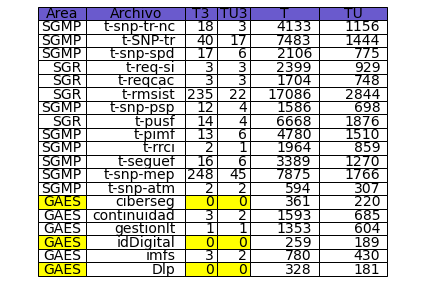

In [ ]:
import matplotlib.pyplot as plt
import six
#define figure and axes
#fig, ax = plt.subplots(1, 1)
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# colors

#create table

tabla = ax.table(cellText=dftextVisu.values,  colLabels=dftextVisu.columns, loc='center')


tabla.auto_set_font_size(False)
tabla.set_fontsize(14)
tabla.auto_set_column_width(col=list(range(len(dftextVisu.columns[0]))))
for i, cel in six.iteritems(tabla._cells):
    if i[0] == 0: 
      cel.set_facecolor('#6A5ACD')  # cambiar el color de fondo de la celdaa


for i in range(dftextVisu.shape[0]):
    for j in range(dftextVisu.shape[1]):
        if dftextVisu.iloc[i, j] == 0:
           tabla[i +1, j].set_facecolor('yellow')
           tabla[i +1, 0].set_facecolor('yellow')

fig.tight_layout()

plt.show()

In [ ]:
dftextVisu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     19 non-null     object
 1   Archivo  19 non-null     object
 2   T3       19 non-null     int64 
 3   TU3      19 non-null     int64 
 4   T        19 non-null     int64 
 5   TU       19 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.0+ KB


In [ ]:
dfs1 = []
for i in range(len(dftextosG2)):
    #print(dftextos2.iloc[i]['Archivo'])
    #data1 = clean2(dftextos2.iloc[i]['Area'])
    data1 = dftextosG2.iloc[i]['Area']
    data = clean2(dftextosG2.iloc[i]['Archivo'])
    texto = dftextosG2.iloc[i]['T.Tokenizado s/ StopWords']
    doc_nltk_fq1 = nltk.FreqDist(wo for wo in texto if wo.lower() not in stopwords)   
    cadena1 = f"{data}"
    print(cadena1)
    dfs1.append(cadena1)
    exec(f"{cadena1} = pd.DataFrame(doc_nltk_fq1.most_common(20), columns=['Palabra', 'Frecuencia'])")
    exec(f"{cadena1}['Area'] = data1")
    exec(f"{cadena1}['Archivo'] = data")



ciberseg
continuidad
gestionIt
idDigital
imfs
Dlp


In [ ]:
dfTemps=[]    
for var in dir():
    if isinstance(locals()[var], pd.core.frame.DataFrame)  and (var[0] not in ['_', 'd']) :
        dfTemps.append(var)
print(type(dfTemps))
print(type(dfTemps[0]))
print("Listado de Dataframes Temporales" , dfTemps)

<class 'list'>
<class 'str'>
Listado de Dataframes Temporales ['Dlp', 'ciberseg', 'continuidad', 'gestionIt', 'idDigital', 'imfs']


In [ ]:
dftextosG3 = pd.concat((Dlp,ciberseg,continuidad,gestionIt,idDigital,imfs))
                 

#dftextos3 = pd.concat(dfs)
print(dfs1)
print(type(dfs1))
print(type(dfs1[0]))

alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]
#Chequeo de Dataframes Temporales
print(alldfs)

['ciberseg', 'continuidad', 'gestionIt', 'idDigital', 'imfs', 'Dlp']
<class 'list'>
<class 'str'>
['Dlp', '_', '_19', '_21', '_22', '_5', '_6', '__', '___', 'ciberseg', 'continuidad', 'dftext', 'dftextVisu', 'dftextosG', 'dftextosG2', 'dftextosG3', 'gestionIt', 'idDigital', 'imfs']


In [ ]:
dftextosG3 = dftextosG3[['Area','Archivo','Palabra','Frecuencia']]
dftextosG3

,Area,Archivo,Palabra,Frecuencia
0,GAES,Dlp,informacion,18
1,GAES,Dlp,datos,13
2,GAES,Dlp,existencia,9
3,GAES,Dlp,aspectos,6
4,GAES,Dlp,definicion,6
...,...,...,...,...
15,GAES,imfs,vinculados,6
16,GAES,imfs,responsabilidades,6
17,GAES,imfs,control,6
18,GAES,imfs,servicio,6


['ciberseg', 'continuidad', 'gestionIt', 'idDigital', 'imfs', 'Dlp']


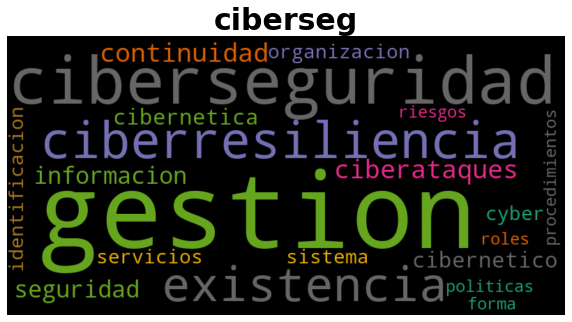

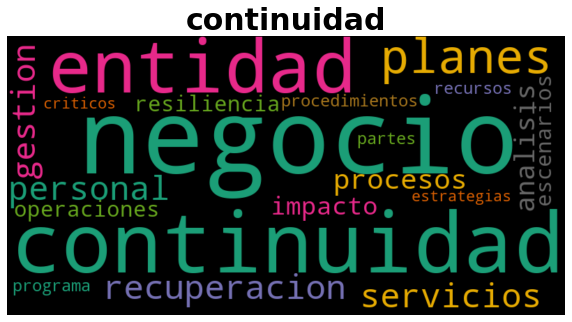

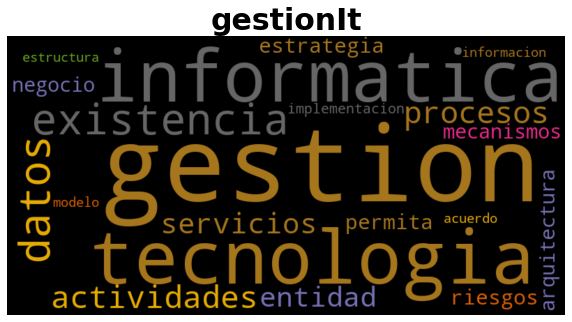

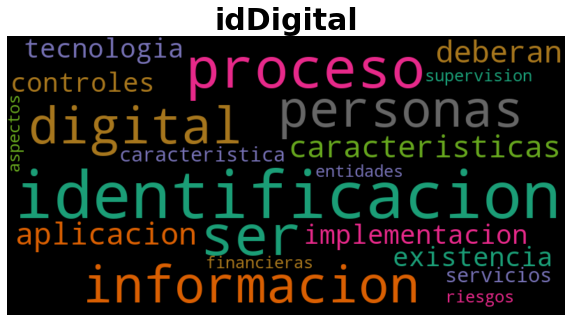

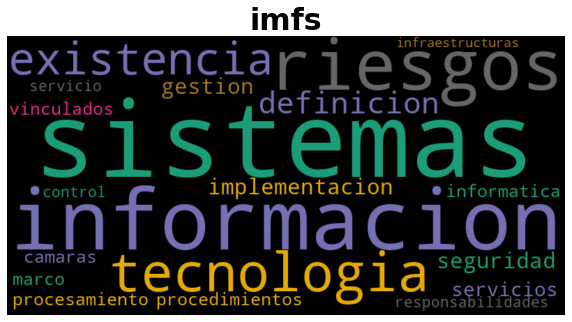

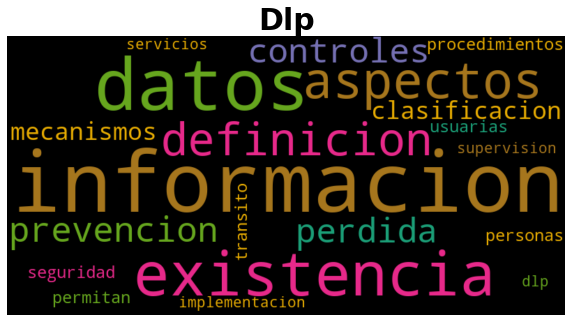

In [ ]:
def filtroNorma(nombre):
 # for i in dfs:
  filtro = dftextosG3[dftextosG3.Archivo==nombre]
  dataf = dict(zip(filtro['Palabra'].tolist(),filtro['Frecuencia'].tolist()))
  wc = WordCloud(width=800, height=400, max_words=200, colormap="Dark2",max_font_size=150).generate_from_frequencies(dataf)
  plt.figure(figsize=(10, 10))
  plt.title(nombre, fontsize = 30,fontweight="bold")
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()
  return 

print(dfs1)

for i in dfs1:
 filtroNorma(i)

In [2]:
! ls
%cd tfi_itba

sample_data  tfi_itba
/content/tfi_itba


In [ ]:
#doc_stanza1 = " ".join(filtra_sentence2) 
import torch
archivo = './Fuentes/es_ancora_lemmatizer.pt'
#modelo = torch.load('es_ancora_lemmatizer.pt', map_location='cpu')
modelo = torch.load(archivo, map_location='cpu')
word_dict, compos_dict = modelo['dicts']
compos_dict[('perdida','NOUN')] = 'perdida'
word_dict['perdida'] = 'perdida'
compos_dict[('desempeñara','VERB')] = 'desempeñar'
word_dict['desempeñara'] = 'desempeñar'
compos_dict[('determinen','VERB')] = 'determinar'
word_dict['determinen'] = 'determinar'
compos_dict[('contemplen','VERB')] = 'contemplar'
word_dict['contemplen'] = 'contemplar'
torch.save(modelo,'./Fuentes/modelogaesp.pt')


In [ ]:
dftextosG['TLematizado'] = dftextosG['T.Tokenizado s/ StopWords'].apply(lematizado)
dftextosG

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package                  |
----------------------------------------
| tokenize  | ancora                   |
| mwt       | ancora                   |
| lemma     | ./Fuentes/modelogaesp.pt |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package                  |
----------------------------------------
| tokenize  | ancora                   |
| mwt       | ancora                   |
| lemma     | ./Fuentes/modelogaesp.pt |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package                  |
----------------------------------------
| tokenize  | ancora                   |
| mwt       | ancora                   |
| lemma     | ./Fuentes/modelogaesp.pt |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package                  |
----------------------------------------
| tokenize  | ancora                   |
| mwt       | ancora                   |
| lemma     | ./Fuentes/modelogaesp.pt |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package                  |
----------------------------------------
| tokenize  | ancora                   |
| mwt       | ancora                   |
| lemma     | ./Fuentes/modelogaesp.pt |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package                  |
----------------------------------------
| tokenize  | ancora                   |
| mwt       | ancora                   |
| lemma     | ./Fuentes/modelogaesp.pt |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


,Area,Archivo,Texto,DIV,sinHtml,TextoL,T.Tokenizado,T.Tokenizado s/ StopWords,TLematizado
0,GAES,ciberseg,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuías de supervisión para la Cibersegu...,Guias de supervision para la Ciberseguridad y ...,"[Guias, de, supervision, para, la, Ciberseguri...","[supervision, ciberseguridad, ciberresiliencia...","[supervision, ciberseguridad, ciberresiliencia..."
1,GAES,continuidad,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuía de Supervisión de Gestión de Cont...,Guia de Supervision de Gestion de Continuidad ...,"[Guia, de, Supervision, de, Gestion, de, Conti...","[guia, supervision, gestion, continuidad, nego...","[guia, supervision, gestion, continuidad, nego..."
2,GAES,gestionIt,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuía de Supervisión de Gestión de Tecn...,Guia de Supervision de Gestion de Tecnologia I...,"[Guia, de, Supervision, de, Gestion, de, Tecno...","[guia, supervision, gestion, tecnologia, infor...","[guia, supervision, gestion, tecnologia, infor..."
3,GAES,idDigital,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuías de supervisión. Identificación d...,Guias de supervision Identificacion digital en...,"[Guias, de, supervision, Identificacion, digit...","[supervision, identificacion, digital, entidad...","[supervision, identificacion, digital, entidad..."
4,GAES,imfs,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuía de Supervisión de Infraestructura...,Guia de Supervision de Infraestructuras del Me...,"[Guia, de, Supervision, de, Infraestructuras, ...","[guia, supervision, infraestructuras, mercado,...","[guia, supervision, infraestructura, mercado, ..."
5,GAES,Dlp,"[HTML, \n, [\n, [\n, <script>\r\n (function(i...","[\n, [\n, [\n, <div class=""clearfix pagina-int...",\n\n\n\nGuía de Supervisión de Prevención de P...,Guia de Supervision de Prevencion de Perdida d...,"[Guia, de, Supervision, de, Prevencion, de, Pe...","[guia, supervision, prevencion, perdida, infor...","[guia, supervision, prevencion, perdida, infor..."


# Visualizaciones 20 Palabras mas frecuentes

In [ ]:
dfs1visu = []
for i in range(len(dftextosG2)):
    #print(dftextos2.iloc[i]['Archivo'])
    #data1 = clean2(dftextos2.iloc[i]['Area'])
    data1 = dftextosG2.iloc[i]['Area']
    data = clean2(dftextosG2.iloc[i]['Archivo'])
    texto = dftextosG.iloc[i]['TLematizado']
    doc_nltk_fq1 = nltk.FreqDist(wo for wo in texto if wo.lower() not in stopwords)   
    cadena1 = f"{data}"
    print(cadena1)
    dfs1visu.append(cadena1)
    exec(f"{cadena1} = pd.DataFrame(doc_nltk_fq1.most_common(20), columns=['Palabra', 'Frecuencia'])")
    exec(f"{cadena1}['Area'] = data1")
    exec(f"{cadena1}['Archivo'] = data")

     

ciberseg
continuidad
gestionIt
idDigital
imfs
Dlp


In [ ]:
ciberseg = ciberseg.sort_values('Frecuencia',ascending=True)
continuidad = continuidad.sort_values('Frecuencia',ascending=True)
gestionIt = gestionIt.sort_values('Frecuencia',ascending=True)
idDigital  = idDigital.sort_values('Frecuencia',ascending=True)
imfs  = imfs.sort_values('Frecuencia',ascending=True)
Dlp = Dlp.sort_values('Frecuencia',ascending=True)

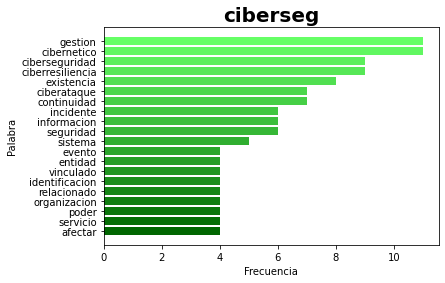

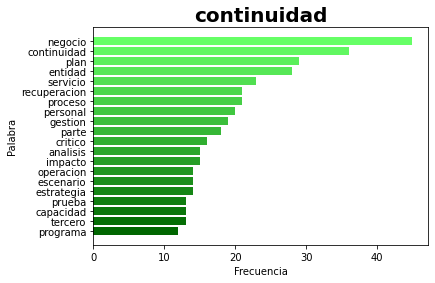

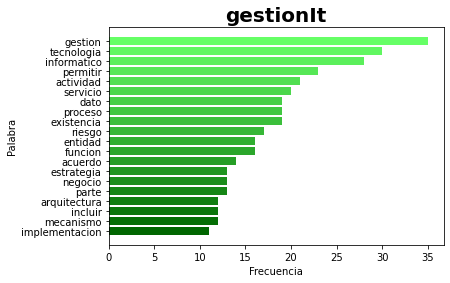

In [ ]:
import numpy as np
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


color1 = "#006600"
color2 = "#66ff66"

plt.barh(ciberseg['Palabra'],ciberseg['Frecuencia'],color = get_color_gradient(color1, color2, len(ciberseg)))
plt.title('ciberseg', fontsize = 20,fontweight="bold")
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
  
plt.show()
  #return 
plt.barh(continuidad['Palabra'],continuidad['Frecuencia'],color = get_color_gradient(color1, color2, len(continuidad)))
plt.title('continuidad', fontsize = 20,fontweight="bold")
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
  
plt.show()
 
plt.barh(gestionIt['Palabra'],gestionIt['Frecuencia'],color = get_color_gradient(color1, color2, len(gestionIt)))
plt.title('gestionIt', fontsize = 20,fontweight="bold")
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
  
plt.show()



# Proceso Lemmatization

In [ ]:
dftextosG2[['TL','TLU']] = dftextosG['TLematizado'].apply(total2)
dftextosG2

,Area,Archivo,T.Tokenizado,T.Tokenizado s/ StopWords,T3,TU3,T,TU,TL,TLU
0,GAES,ciberseg,"[Guias, de, supervision, para, la, Ciberseguri...","[supervision, ciberseguridad, ciberresiliencia...",0,0,361,220,361,198
1,GAES,continuidad,"[Guia, de, Supervision, de, Gestion, de, Conti...","[guia, supervision, gestion, continuidad, nego...",3,2,1593,685,1593,576
2,GAES,gestionIt,"[Guia, de, Supervision, de, Gestion, de, Tecno...","[guia, supervision, gestion, tecnologia, infor...",1,1,1353,604,1353,518
3,GAES,idDigital,"[Guias, de, supervision, Identificacion, digit...","[supervision, identificacion, digital, entidad...",0,0,259,189,259,174
4,GAES,imfs,"[Guia, de, Supervision, de, Infraestructuras, ...","[guia, supervision, infraestructuras, mercado,...",3,2,780,430,780,370
5,GAES,Dlp,"[Guia, de, Supervision, de, Prevencion, de, Pe...","[guia, supervision, prevencion, perdida, infor...",0,0,328,181,328,166


# Integración de Dataframes de Textos Ordenados - Guías de Supervisión

In [ ]:
urldata1 = "https://raw.githubusercontent.com/gusper01/tfi_itba/main/Datasets/dftextos2PL.csv"
dftext1 = pd.read_csv(urldata1)
dftext1

,Unnamed: 0,Area,Archivo,T.Tokenizado,T.Tokenizado s/ StopWords,T3,TU3,T,TU,TL,TLU
0,0,SGMP,t-snp-tr-nc,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSF...","['ultima', 'comunicacion', 'incorporada', 'tex...",18,3,4133,1156,4133,896
1,1,SGMP,t-SNP-tr,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSF...","['ultima', 'comunicacion', 'incorporada', 'tex...",40,17,7483,1444,7485,1119
2,2,SGMP,t-snp-spd,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'SERVIC...","['ultima', 'comunicacion', 'incorporada', 'tex...",17,6,2106,775,2108,646
3,3,SGR,t-req-si,"['REQUISITOS', 'OPERATIVOS', 'MINIMOS', 'DEL',...","['ultima', 'comunicacion', 'incorporada', 'tex...",3,3,2399,929,2399,762
4,4,SGR,t-reqcac,"['REQUISITOS', 'OPERATIVOS', 'MINIMOS', 'DE', ...","['ultima', 'comunicacion', 'incorporada', 'tex...",3,3,1704,748,1704,625
5,5,SGR,t-rmsist,"['REQUISITOS', 'MINIMOS', 'DE', 'GESTION', 'IM...","['ultima', 'comunicacion', 'incorporada', 'tex...",235,22,17086,2844,17086,2125
6,6,SGMP,t-snp-psp,"['PROVEEDORES', 'DE', 'SERVICIOS', 'DE', 'PAGO...","['ultima', 'comunicacion', 'incorporada', 'tex...",12,4,1586,698,1586,586
7,7,SGR,t-pusf,"['PROTECCION', 'DE', 'LOS', 'USUARIOS', 'DE', ...","['ultima', 'comunicacion', 'incorporada', 'tex...",14,4,6668,1876,6669,1451
8,8,SGMP,t-pimf,"['PRINCIPIOS', 'PARA', 'LAS', 'INFRAESTRUCTURA...","['ultima', 'comunicacion', 'incorporada', 'tex...",13,6,4780,1510,4780,1179
9,9,SGMP,t-rrci,"['LINEAMIENTOS', 'PARA', 'LA', 'RESPUESTA', 'Y...","['rrci', 'ultima', 'comunicacion', 'incorporad...",2,1,1964,859,1964,709


In [ ]:
dftext1 = pd.concat([dftext1, dftextosG2])
dftext1 = dftext1.drop(['Unnamed: 0'], axis = 1)
#print(dftext.columns)


In [ ]:
dftext1.index = range(dftext1.shape[0])
dftext1

,Area,Archivo,T.Tokenizado,T.Tokenizado s/ StopWords,T3,TU3,T,TU,TL,TLU
0,SGMP,t-snp-tr-nc,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSF...","['ultima', 'comunicacion', 'incorporada', 'tex...",18,3,4133,1156,4133,896
1,SGMP,t-SNP-tr,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'TRANSF...","['ultima', 'comunicacion', 'incorporada', 'tex...",40,17,7483,1444,7485,1119
2,SGMP,t-snp-spd,"['SISTEMA', 'NACIONAL', 'DE', 'PAGOS', 'SERVIC...","['ultima', 'comunicacion', 'incorporada', 'tex...",17,6,2106,775,2108,646
3,SGR,t-req-si,"['REQUISITOS', 'OPERATIVOS', 'MINIMOS', 'DEL',...","['ultima', 'comunicacion', 'incorporada', 'tex...",3,3,2399,929,2399,762
4,SGR,t-reqcac,"['REQUISITOS', 'OPERATIVOS', 'MINIMOS', 'DE', ...","['ultima', 'comunicacion', 'incorporada', 'tex...",3,3,1704,748,1704,625
5,SGR,t-rmsist,"['REQUISITOS', 'MINIMOS', 'DE', 'GESTION', 'IM...","['ultima', 'comunicacion', 'incorporada', 'tex...",235,22,17086,2844,17086,2125
6,SGMP,t-snp-psp,"['PROVEEDORES', 'DE', 'SERVICIOS', 'DE', 'PAGO...","['ultima', 'comunicacion', 'incorporada', 'tex...",12,4,1586,698,1586,586
7,SGR,t-pusf,"['PROTECCION', 'DE', 'LOS', 'USUARIOS', 'DE', ...","['ultima', 'comunicacion', 'incorporada', 'tex...",14,4,6668,1876,6669,1451
8,SGMP,t-pimf,"['PRINCIPIOS', 'PARA', 'LAS', 'INFRAESTRUCTURA...","['ultima', 'comunicacion', 'incorporada', 'tex...",13,6,4780,1510,4780,1179
9,SGMP,t-rrci,"['LINEAMIENTOS', 'PARA', 'LA', 'RESPUESTA', 'Y...","['rrci', 'ultima', 'comunicacion', 'incorporad...",2,1,1964,859,1964,709


In [ ]:
dftextVisu1 = dftext1.drop(['T.Tokenizado','T.Tokenizado s/ StopWords','T3','TU3'], axis = 1)
dftextVisu1

,Area,Archivo,T,TU,TL,TLU
0,SGMP,t-snp-tr-nc,4133,1156,4133,896
1,SGMP,t-SNP-tr,7483,1444,7485,1119
2,SGMP,t-snp-spd,2106,775,2108,646
3,SGR,t-req-si,2399,929,2399,762
4,SGR,t-reqcac,1704,748,1704,625
5,SGR,t-rmsist,17086,2844,17086,2125
6,SGMP,t-snp-psp,1586,698,1586,586
7,SGR,t-pusf,6668,1876,6669,1451
8,SGMP,t-pimf,4780,1510,4780,1179
9,SGMP,t-rrci,1964,859,1964,709


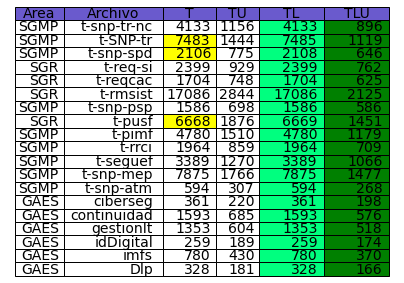

In [ ]:
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# colors

#create table

tabla = ax.table(cellText=dftextVisu1.values,  colLabels=dftextVisu1.columns, loc='center')


tabla.auto_set_font_size(False)
tabla.set_fontsize(14)
tabla.auto_set_column_width(col=list(range(len(dftextVisu1.columns[0]))))
for i, cel in six.iteritems(tabla._cells):
    if i[0] == 0: 
      cel.set_facecolor('#6A5ACD')  # cambiar el color de fondo de la celdaa
    elif i[1] == 4:
      cel.set_facecolor('#00FF7F')
    elif i[1] == 5:
      cel.set_facecolor('#008000')
for i in range(dftextVisu.shape[0]):
    for j in range(dftextVisu.shape[1]):
        if dftextVisu1.iloc[i, 2] != dftextVisu1.iloc[i, 4]:
           tabla[i +1, 2].set_facecolor('yellow')
        #   tabla[i +1, 0].set_facecolor('yellow')
fig.tight_layout()

plt.show()

In [ ]:
dfsl1 = []
for i in range(len(dftextosG2)):
    #print(dftextos2.iloc[i]['Archivo'])
    #data1 = clean2(dftextos2.iloc[i]['Area'])
    # total_tl  = total de palabras del documento(archivo, norma) lematizado
    # igual a la columna TL del dataframe dftexto2 

    data1 = dftextosG2.iloc[i]['Area']
    data = clean2(dftextosG2.iloc[i]['Archivo'])
    texto = dftextosG.iloc[i]['TLematizado']
    total_tl = dftextosG2.iloc[i]['TL']
    doc_nltk_fq1 = nltk.FreqDist(wo for wo in texto if wo.lower() not in stopwords)   
    cadena1la = f"l{data}"
    print(cadena1la)
    dfs1.append(cadena1la)
    exec(f"{cadena1la} = pd.DataFrame(doc_nltk_fq1.most_common(20), columns=['Palabra', 'Frecuencia'])")
    exec(f"{cadena1la}['Area'] = data1")
    exec(f"{cadena1la}['Archivo'] = data")
    exec(f"{cadena1la}['TL'] = total_tl")


lciberseg
lcontinuidad
lgestionIt
lidDigital
limfs
lDlp


In [ ]:
dftextosG4 = pd.concat((lciberseg,lcontinuidad,lgestionIt,lidDigital,limfs,lDlp))
                 

In [ ]:
dftextosG4 = dftextosG4[['Area','Archivo','Palabra','Frecuencia','TL']]
dftextosG4

,Area,Archivo,Palabra,Frecuencia,TL
0,GAES,ciberseg,gestion,11,361
1,GAES,ciberseg,cibernetico,11,361
2,GAES,ciberseg,ciberseguridad,9,361
3,GAES,ciberseg,ciberresiliencia,9,361
4,GAES,ciberseg,existencia,8,361
...,...,...,...,...,...
15,GAES,Dlp,servicio,4,328
16,GAES,Dlp,seguridad,4,328
17,GAES,Dlp,transito,4,328
18,GAES,Dlp,supervision,3,328


# Generación TF IDF

In [ ]:
# Se agrega TD (total de documentos del corpus ..sale de la cantidad de filas 
# del Dataframe dftextos2 
dftextosG4['TD'] = dftextosG2.shape[0] 
dftextosG4

,Area,Archivo,Palabra,Frecuencia,TL,TD
0,GAES,ciberseg,gestion,11,361,6
1,GAES,ciberseg,cibernetico,11,361,6
2,GAES,ciberseg,ciberseguridad,9,361,6
3,GAES,ciberseg,ciberresiliencia,9,361,6
4,GAES,ciberseg,existencia,8,361,6
...,...,...,...,...,...,...
15,GAES,Dlp,servicio,4,328,6
16,GAES,Dlp,seguridad,4,328,6
17,GAES,Dlp,transito,4,328,6
18,GAES,Dlp,supervision,3,328,6


In [ ]:
urldata2 = "https://raw.githubusercontent.com/gusper01/tfi_itba/main/Datasets/dftextos4.csv"
dftext2 = pd.read_csv(urldata2)
dftext2

,Unnamed: 0,Area,Archivo,Palabra,Frecuencia,TL,TD
0,0,SGMP,tsnptrnc,transferencia,202,4133,13
1,1,SGMP,tsnptrnc,pago,180,4133,13
2,2,SGMP,tsnptrnc,esquema,81,4133,13
3,3,SGMP,tsnptrnc,cuenta,73,4133,13
4,4,SGMP,tsnptrnc,entidad,69,4133,13
...,...,...,...,...,...,...,...
255,15,SGMP,tsnpatm,servicio,7,594,13
256,16,SGMP,tsnpatm,norma,6,594,13
257,17,SGMP,tsnpatm,identificacion,6,594,13
258,18,SGMP,tsnpatm,persona,6,594,13


In [ ]:
dftext2 = pd.concat([dftext2, dftextosG4])
dftext2 = dftext2.drop(['Unnamed: 0'], axis = 1)

In [ ]:
dftext2.index = range(dftext2.shape[0])
dftext2['TD'] = 19
dftext2

,Area,Archivo,Palabra,Frecuencia,TL,TD
0,SGMP,tsnptrnc,transferencia,202,4133,19
1,SGMP,tsnptrnc,pago,180,4133,19
2,SGMP,tsnptrnc,esquema,81,4133,19
3,SGMP,tsnptrnc,cuenta,73,4133,19
4,SGMP,tsnptrnc,entidad,69,4133,19
...,...,...,...,...,...,...
375,GAES,Dlp,servicio,4,328,19
376,GAES,Dlp,seguridad,4,328,19
377,GAES,Dlp,transito,4,328,19
378,GAES,Dlp,supervision,3,328,19


id token count total_count tf

8158 3.546906e+17 bar 1 20 0.

8159 3.546906e+17 barman 1 20 0.05

8164 3.546906e+17 says 1 20 0.05

id = norma

token = palabra

count = frecuencia cantidad de veces q aparece la palabra en la norma

total_count = cantidad de palabras de la norma TL (cantidad de palabras lematizada

tf = count / total_count

Frecuencia de Terminos = la cantidad de veces q aparece la palabra en una norma dividido la cantidad de palabras en la norma

In [ ]:
# *****************************
# Matriz de Frecuencia TF
# *****************************

TF = dftext2.copy()
TF['TF'] = TF['Frecuencia'] / TF['TL']
TF

,Area,Archivo,Palabra,Frecuencia,TL,TD,TF
0,SGMP,tsnptrnc,transferencia,202,4133,19,0.048875
1,SGMP,tsnptrnc,pago,180,4133,19,0.043552
2,SGMP,tsnptrnc,esquema,81,4133,19,0.019598
3,SGMP,tsnptrnc,cuenta,73,4133,19,0.017663
4,SGMP,tsnptrnc,entidad,69,4133,19,0.016695
...,...,...,...,...,...,...,...
375,GAES,Dlp,servicio,4,328,19,0.012195
376,GAES,Dlp,seguridad,4,328,19,0.012195
377,GAES,Dlp,transito,4,328,19,0.012195
378,GAES,Dlp,supervision,3,328,19,0.009146


In [ ]:
# *****************************
# Matriz Inversa de Documentos IDF
# *****************************

IDF = dftext2.copy()
# calculo la cantidad de documentos/normas/regulaciones del corpus 
# en los que aparece cada palabra o termino 
IDF = IDF.groupby(['Palabra', 'Archivo'])['Palabra'].agg(['count']).reset_index()
IDF['tdocu'] = IDF.groupby('Palabra')['count'].transform(sum)
IDF3 = IDF.head(10)
IDF3

,Palabra,Archivo,count,tdocu
0,abierto,tsnpmep,1,1
1,abreviado,tsnpmep,1,1
2,acceso,treqcac,1,3
3,acceso,treqsi,1,3
4,acceso,tsnpatm,1,3
5,aceptador,tsnptrnc,1,1
6,actividad,gestionIt,1,4
7,actividad,idDigital,1,4
8,actividad,treqsi,1,4
9,actividad,trrci,1,4


In [ ]:
# continuacion IDF
import numpy as np

#IDF['IDF'] = np.log(dftextos2.shape[0] / IDF['tdocu'])
IDF['IDF'] = np.log((19 + 1) / (IDF['tdocu'] + 1)) +1 # El valor 19 sale de la cantidad total de documentos
IDF = IDF[['Palabra','tdocu','IDF']].drop_duplicates()
IDF.sort_values(by='IDF').head(10)
lista_tokens = IDF['Palabra'].tolist()
lista_docs = (dftextVisu1['Archivo'].apply(clean2).tolist())
#el valor IDF para una palabra permanece igual en todos los documentos, 
#ya que depende del número total de documentos. Por otro lado, los valores de TF de una 
#palabra difieren de un documento a otro

In [ ]:
import numpy as np

pruebaIDF = np.log(((19 +1) / (5 +1)))+1
print(pruebaIDF)

2.203972804325936


In [ ]:
pd.set_option('max_rows', None)

In [ ]:
#pd.set_option('max_columns', 6)


# TF - ITF 
# ***********************

TF_IDF = pd.merge(left=TF, right=IDF, on='Palabra')
TF_IDF['TF_IDF'] = TF_IDF['TF'] * TF_IDF['IDF']
#TF_IDF.sort_values(by='Archivo').head(10)
TF_IDF.sort_values(['Frecuencia','Archivo','tdocu','Palabra'], ascending = False).head(20)


,Area,Archivo,Palabra,Frecuencia,TL,TD,TF,tdocu,IDF,TF_IDF
46,SGR,trmsist,deber,435,17086,19,0.025459,12,1.430783,0.036427
1,SGMP,tSNPtr,transferencia,331,7485,19,0.044222,5,2.203973,0.097464
24,SGR,trmsist,entidad,323,17086,19,0.018904,14,1.287682,0.024343
124,SGR,tpusf,servicio,282,6669,19,0.042285,13,1.356675,0.057367
230,SGR,tpusf,usuario,253,6669,19,0.037937,4,2.386294,0.090528
233,SGR,trmsist,rco,247,17086,19,0.014456,1,3.302585,0.047743
66,SGR,tpusf,financiero,245,6669,19,0.036737,12,1.430783,0.052563
234,SGR,trmsist,rir,244,17086,19,0.014281,1,3.302585,0.047163
21,SGMP,tSNPtr,entidad,235,7485,19,0.031396,14,1.287682,0.040428
235,SGR,trmsist,rcc,230,17086,19,0.013461,1,3.302585,0.044457


In [ ]:
Vector = TF_IDF.drop(['Area','Frecuencia','TL','TD','TF','tdocu','IDF'], axis = 1)
Vector

,Archivo,Palabra,TF_IDF
0,tsnptrnc,transferencia,0.107719
1,tSNPtr,transferencia,0.097464
2,tsnpspd,transferencia,0.031366
3,tsnppsp,transferencia,0.019455
4,tsnpmep,transferencia,0.054854
5,tsnptrnc,pago,0.089274
6,tSNPtr,pago,0.040257
7,tsnpspd,pago,0.035979
8,tsnppsp,pago,0.139584
9,tpimf,pago,0.014580


# Generación de Matriz de Vectores TF IDF

In [ ]:
datos = []
#Vector2 = pd.DataFrame(lista_docs, columns= lista_tokens)

Vector2 = pd.DataFrame(datos, columns=lista_tokens, index=lista_docs)
Vector2

,abierto,abreviado,acceso,aceptador,actividad,acuerdo,adecuado,adicional,afectar,agencia,...,tesoro,transaccion,transferencia,transito,traves,uso,usuaria,usuario,valor,vinculado
tsnptrnc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tSNPtr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tsnpspd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treqsi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treqcac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trmsist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tsnppsp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpusf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpimf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trrci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Vector = pd.pivot_table(Vector, columns='Archivo', values=columnas).reset_index()
#tf_idf_model = np.transpose(Vector)  
ls_tf_idf = []
colu = ('Palabra','Archivo','TF_IDF')
for i in range(len(Vector)):
  #cod = test1_df.loc[i:i, 'code'].to_string(index=False)
  cod = Vector['Palabra'][i]
  #cod = test1_df.loc[i:i, 'code']
  s = Vector.loc[i:i, 'Archivo'].to_string(index=False)
#  s = test1_df.loc[i:i, 'cant'].to_string(index=False)
  c = Vector.loc[i:i, 'TF_IDF'].to_string(index=False)
  print(cod,'',s,'',c)
  ls_tf_idf.append([cod, s,c])
  #test2_df.loc[cod,s] = c
  Vector2.loc[s,cod] = c
df_tf_idf = pd.DataFrame(ls_tf_idf, columns= colu ) 


transferencia  tsnptrnc  0.107719
transferencia  tSNPtr  0.097464
transferencia  tsnpspd  0.031366
transferencia  tsnppsp  0.019455
transferencia  tsnpmep  0.054854
pago  tsnptrnc  0.089274
pago  tSNPtr  0.040257
pago  tsnpspd  0.035979
pago  tsnppsp  0.139584
pago  tpimf  0.01458
pago  tsnpmep  0.048675
esquema  tsnptrnc  0.056779
esquema  tsnppsp  0.042014
cuenta  tsnptrnc  0.033847
cuenta  tSNPtr  0.02509
cuenta  tsnpspd  0.03818
cuenta  tsnppsp  0.033831
cuenta  tpusf  0.013505
cuenta  tsnpmep  0.046964
cuenta  tsnpatm  0.029035
entidad  tsnptrnc  0.021498
entidad  tSNPtr  0.040428
entidad  tsnpspd  0.023212
entidad  treqsi  0.022007
entidad  trmsist  0.024343
entidad  tsnppsp  0.015426
entidad  tpusf  0.007723
entidad  tseguef  0.042175
entidad  tsnpmep  0.029923
entidad  tsnpatm  0.041188
entidad  ciberseg  0.014268
entidad  continuidad  0.022633
entidad  gestionIt  0.015228
entidad  idDigital  0.019887
fondo  tsnptrnc  0.042933
fondo  tsnppsp  0.024679
fondo  tsnpmep  0.020213
c

In [ ]:
Vector2 = Vector2.fillna(0)
Vector2

,abierto,abreviado,acceso,aceptador,actividad,acuerdo,adecuado,adicional,afectar,agencia,...,tesoro,transaccion,transferencia,transito,traves,uso,usuaria,usuario,valor,vinculado
tsnptrnc,0,0,0,0.031963,0,0,0,0,0,0,...,0,0,0.107719,0,0,0,0,0,0,0
tSNPtr,0,0,0,0,0,0,0,0.024709,0,0,...,0,0.0503,0.097464,0,0,0,0,0,0,0
tsnpspd,0,0,0,0,0,0,0,0,0,0,...,0,0,0.031366,0,0.025067,0,0,0,0,0
treqsi,0,0,0.017404,0,0.021883,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
treqcac,0,0,0.030627,0,0,0,0.029072,0,0,0.05233,...,0,0,0,0,0,0,0,0.019606,0,0
trmsist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.013547,0,0
tsnppsp,0,0,0,0,0,0,0,0,0,0,...,0,0,0.019455,0,0,0,0,0,0,0
tpusf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.090528,0,0
tpimf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.015758,0
trrci,0,0,0,0,0.032805,0.022127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_tf_idf['y'] = pd.factorize(df_tf_idf['Archivo'])[0]
df_tf_idf

,Palabra,Archivo,TF_IDF,y
0,transferencia,tsnptrnc,0.107719,0
1,transferencia,tSNPtr,0.097464,1
2,transferencia,tsnpspd,0.031366,2
3,transferencia,tsnppsp,0.019455,3
4,transferencia,tsnpmep,0.054854,4
5,pago,tsnptrnc,0.089274,0
6,pago,tSNPtr,0.040257,1
7,pago,tsnpspd,0.035979,2
8,pago,tsnppsp,0.139584,3
9,pago,tpimf,0.01458,5


In [ ]:
# recorrer el dataframe y plotear los valores altos de tf-idf
#Vector2['transferencia'].max()
#Vector2.info()
Vector2 = Vector2.astype(float) 
max = Vector2['transferencia'].max()
print(max)


0.107719


In [ ]:
Vector2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, tsnptrnc to Dlp
Columns: 181 entries, abierto to vinculado
dtypes: float64(181)
memory usage: 27.6+ KB


In [ ]:
Vector2.columns

Index(['abierto', 'abreviado', 'acceso', 'aceptador', 'actividad', 'acuerdo',
       'adecuado', 'adicional', 'afectar', 'agencia',
       ...
       'tesoro', 'transaccion', 'transferencia', 'transito', 'traves', 'uso',
       'usuaria', 'usuario', 'valor', 'vinculado'],
      dtype='object', length=181)

# Visualización de Matriz de Vectores TF IDF

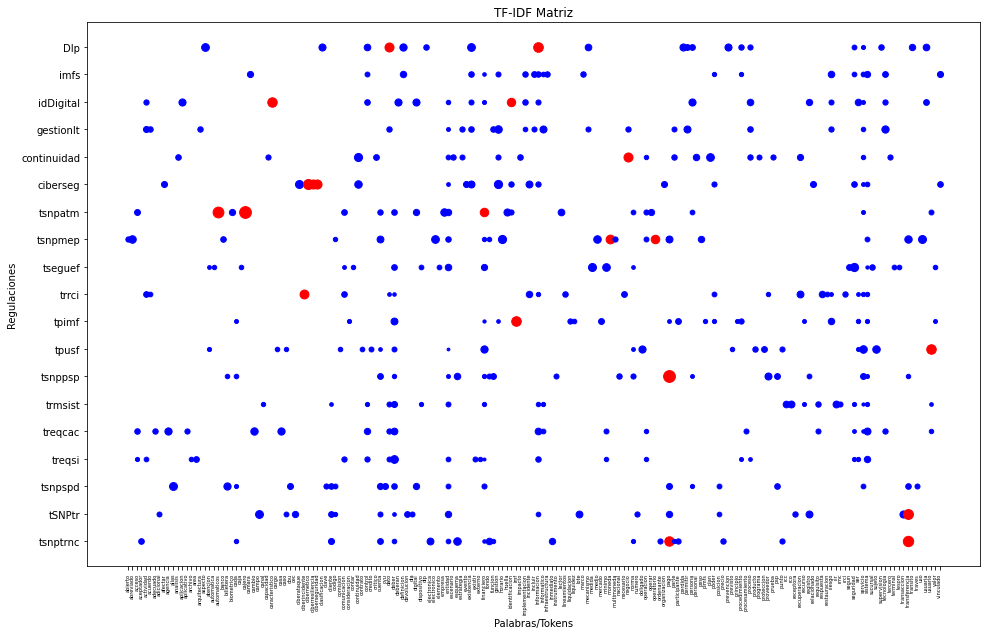

In [ ]:
plt.rcParams["figure.figsize"] = (16, 10)
palabras_imp = []
palabras_impx = []
for index, row in Vector2.iterrows():
    for col in Vector2.columns:
        if float(row[col]) > 0.07:
            plt.scatter(col, index, s=row[col]*1000, color='red')
            palabras_imp.append([col, index,row[col]])
            
        else:
            plt.scatter(col, index, s=row[col]*1000, color='blue')
        if float(row[col]) != 0.0:
           palabras_impx.append([index, col,row[col]])            
# configurar el gráfico

plt.xticks(range(len(Vector2.columns)), Vector2.columns, fontsize=5, rotation = 90)
plt.yticks(range(len(Vector2.index)), Vector2.index)
plt.xlabel('Palabras/Tokens')
plt.ylabel('Regulaciones')
plt.title('TF-IDF Matriz')
plt.show()

In [ ]:
 Vector2.iloc[[0]]


,abierto,abreviado,acceso,aceptador,actividad,acuerdo,adecuado,adicional,afectar,agencia,...,tesoro,transaccion,transferencia,transito,traves,uso,usuaria,usuario,valor,vinculado
tsnptrnc,0.0,0.0,0.0,0.031963,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.107719,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualizaciones de las 20 Palabras con mayor valor TF_IDF por Documento

In [ ]:
 # lista primer posicion de lista(palabras_impx) de palabras con valor TF_IDF > a 0.0
 for p in palabras_impx:
   print(p[0])

In [ ]:
unique_arch = []
for p in palabras_impx:
  if p[0] not in unique_arch:
    unique_arch.append(p[0])

print(unique_arch)
print(len(unique_arch))

['tsnptrnc', 'tSNPtr', 'tsnpspd', 'treqsi', 'treqcac', 'trmsist', 'tsnppsp', 'tpusf', 'tpimf', 'trrci', 'tseguef', 'tsnpmep', 'tsnpatm', 'ciberseg', 'continuidad', 'gestionIt', 'idDigital', 'imfs', 'Dlp']
19


In [ ]:
colu1 = ['Archivo','Palabra','TF_IDF']
df_palabras_impx = pd.DataFrame(palabras_impx, columns= colu1 ) 
df_palabras_impx

In [ ]:
in_Dlp = df_palabras_impx['Archivo'] == 'Dlp'
Dlps = df_palabras_impx[in_Dlp]
in_imfs = df_palabras_impx['Archivo'] == 'imfs'
imfss = df_palabras_impx[in_imfs]
in_idDigital = df_palabras_impx['Archivo'] == 'idDigital'
idDigitals = df_palabras_impx[in_idDigital]
in_tsnppsp = df_palabras_impx['Archivo'] == 'tsnppsp'
tsnppsps = df_palabras_impx[in_tsnppsp]
in_trmsist = df_palabras_impx['Archivo'] == 'trmsist'
trmsists = df_palabras_impx[in_trmsist]
in_tpusf = df_palabras_impx['Archivo'] == 'tpusf'
tpusfs = df_palabras_impx[in_tpusf]
in_tSNPtr = df_palabras_impx['Archivo'] == 'tSNPtr'
tSNPtrs = df_palabras_impx[in_tSNPtr]
in_trrci = df_palabras_impx['Archivo'] == 'trrci'
trrcis = df_palabras_impx[in_trrci]
in_tsnpspd = df_palabras_impx['Archivo'] == 'tsnpspd'
tsnpspds = df_palabras_impx[in_tsnpspd]
in_ciberseg = df_palabras_impx['Archivo'] == 'ciberseg'
cibersegs = df_palabras_impx[in_ciberseg]
in_tsnpatm = df_palabras_impx['Archivo'] == 'tsnpatm'
tsnpatms = df_palabras_impx[in_tsnpatm]
in_continuidad = df_palabras_impx['Archivo'] == 'continuidad'
continuidads = df_palabras_impx[in_continuidad]


#tsnppsps

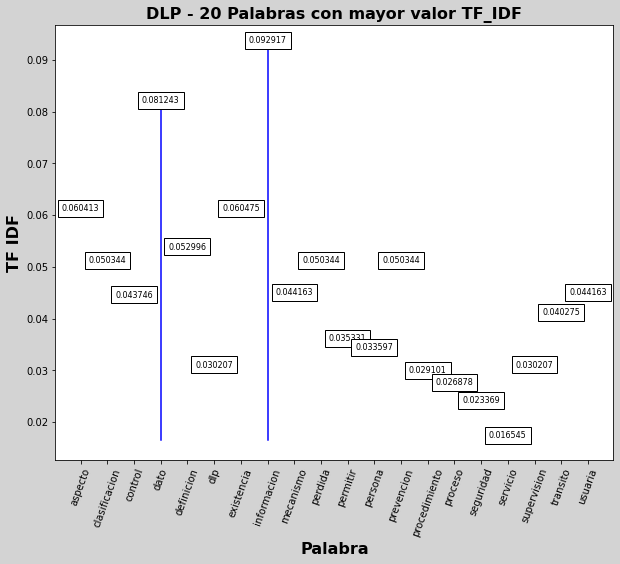

In [ ]:
nombres = Dlps['Palabra']
valores = Dlps['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([7, 7], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([3, 3], [np.min(valores), 0.081243], linestyle='-', color='blue')
plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('DLP - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')
plt.show()

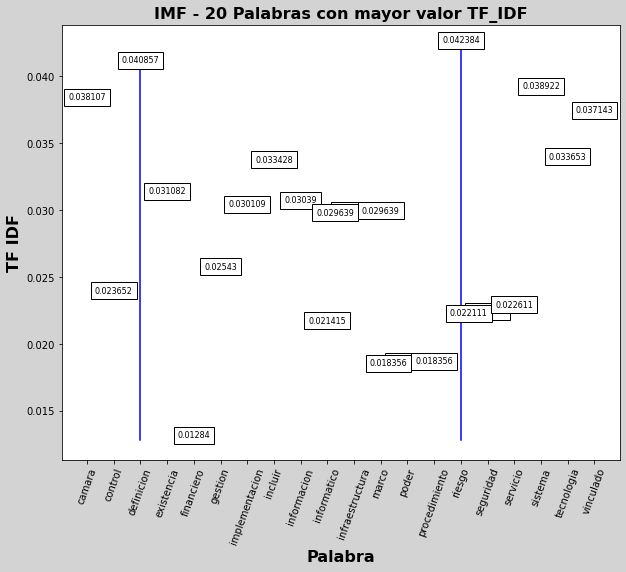

In [ ]:
nombres =imfss['Palabra']
valores = imfss['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([14, 14], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([2, 2], [np.min(valores), 0.040857], linestyle='-', color='blue')
plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
    if (xi == 12) or (xi == 10) or (xi == 15) :
      plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
      
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('IMF - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

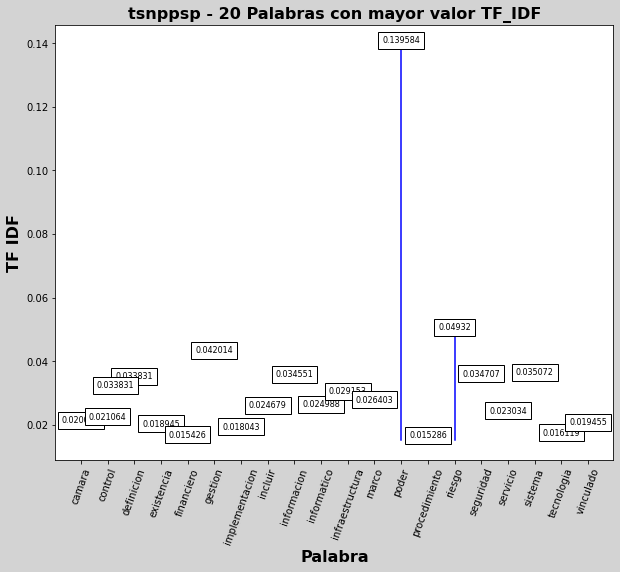

In [ ]:
pnombres =tsnppsps['Palabra']
valores = tsnppsps['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([12, 12], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([14, 14], [np.min(valores), 0.04932], linestyle='-', color='blue')
plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
    if (xi == 2): #or (xi == 10) or (xi == 15) :
        plt.text(xi, yi, yi, va='top', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
      
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('tsnppsp - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

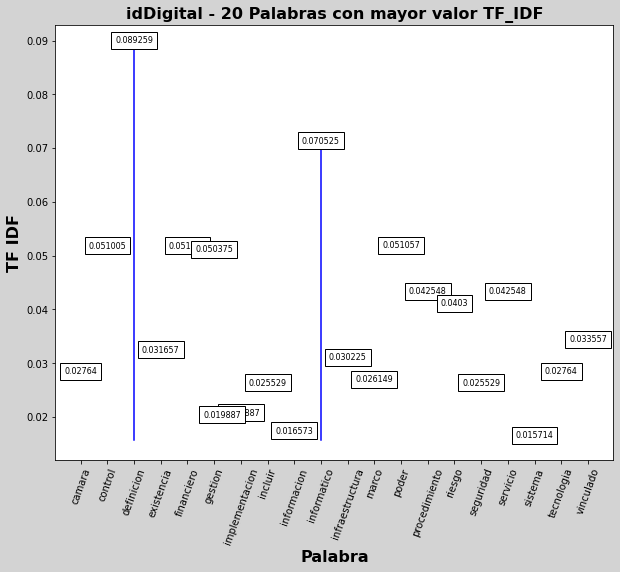

In [ ]:
pnombres =idDigitals['Palabra']
valores = idDigitals['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([2, 2], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([9, 9], [np.min(valores), 0.070525], linestyle='-', color='blue')
plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
    if (xi == 6): #or (xi == 10) or (xi == 15) :
      plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
      
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('idDigital - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

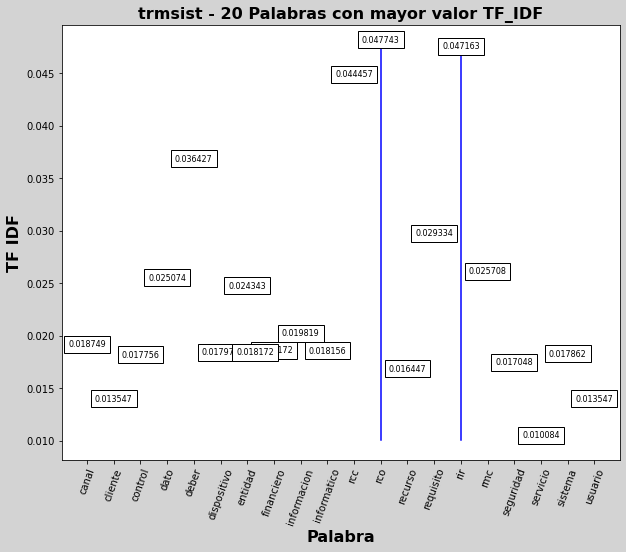

In [ ]:
nombres =trmsists['Palabra']
valores = trmsists['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([11, 11], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([14, 14], [np.min(valores), 0.047163], linestyle='-', color='blue')
plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
    if (xi == 7): #or (xi == 10) or (xi == 15) :
      plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
      
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('trmsist - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

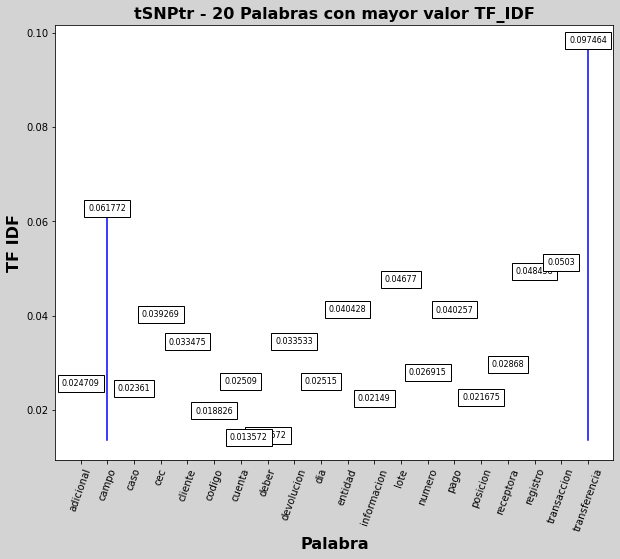

In [ ]:
nombres =tSNPtrs['Palabra']
valores = tSNPtrs['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([19, 19], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([1, 1], [np.min(valores), 0.061772], linestyle='-', color='blue')
plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
    if (xi == 7): #or (xi == 10) or (xi == 15) :
      plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
      
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('tSNPtr - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

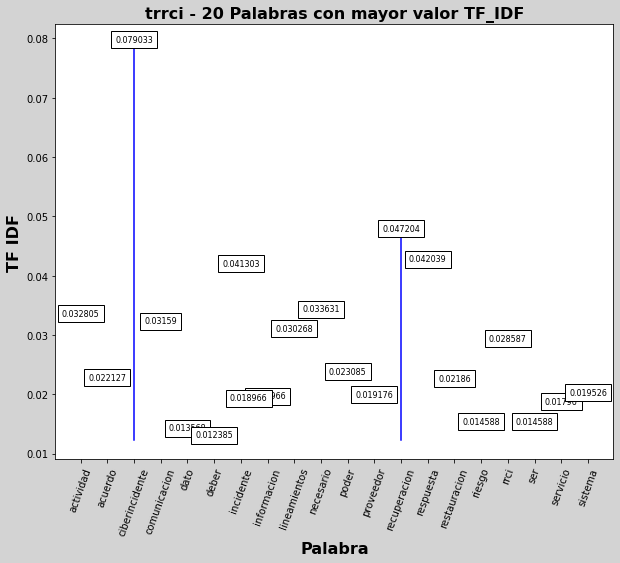

In [ ]:
nombres =trrcis['Palabra']
valores = trrcis['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([2, 2], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([12, 12], [np.min(valores), 0.047204], linestyle='-', color='blue')
plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
    if (xi == 7): #or (xi == 10) or (xi == 15) :
      plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
      
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('trrci - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

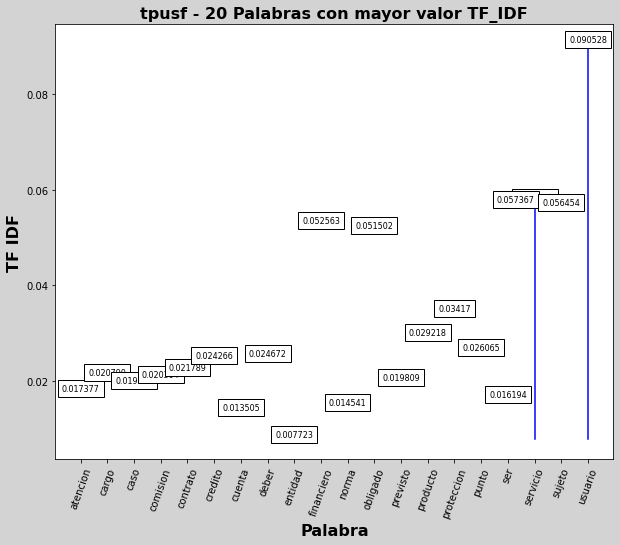

In [ ]:
nombres =tpusfs['Palabra']
valores = tpusfs['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([19, 19], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([17, 17], [np.min(valores), 0.057367], linestyle='-', color='blue')
plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
    if (xi == 17): #or (xi == 10) or (xi == 15) :
      plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
      
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('tpusf - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

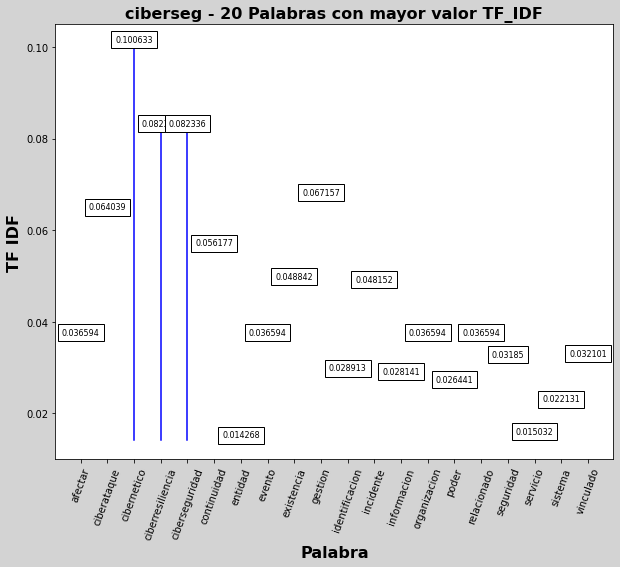

In [ ]:
#cibersegs
#tsnpspds
nombres =cibersegs['Palabra']
valores = cibersegs['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([2, 2], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([4, 4], [np.min(valores), 0.082336], linestyle='-', color='blue')
plt.plot([3, 3], [np.min(valores), 0.082336], linestyle='-', color='blue')

plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
     
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('ciberseg - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

In [ ]:
cibersegs.sort_values('TF_IDF',ascending=False)

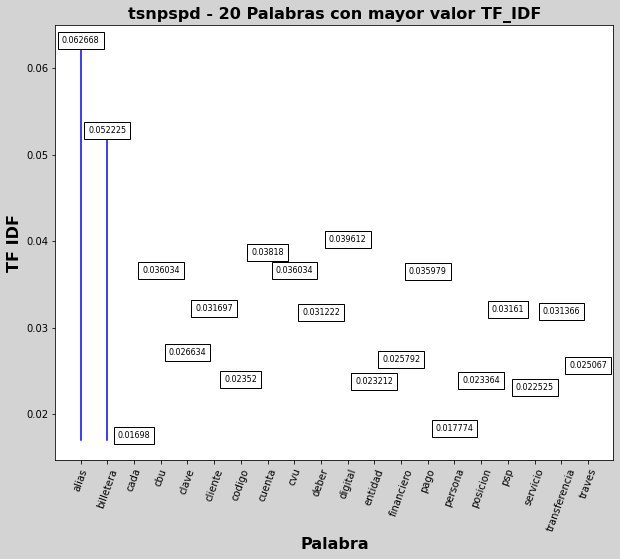

In [ ]:
#cibersegs
#tsnpspds
nombres =tsnpspds['Palabra']
valores = tsnpspds['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([0, 0], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([1, 1], [np.min(valores), 0.052225], linestyle='-', color='blue')

plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
   # if (xi == 5): #or (xi == 10) or (xi == 15) :
   #   plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
   # if (xi == 4): #or (xi == 10) or (xi == 15) :
    #  plt.text(xi, yi, yi, va='bottom', ha='left', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )  
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('tsnpspd - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

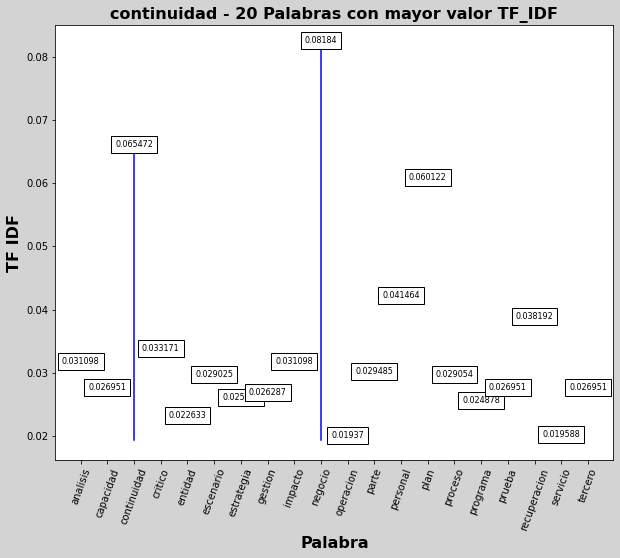

In [ ]:
#continuidad
#tsnpatm

nombres =continuidads['Palabra']
valores = continuidads['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([9, 9], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([2, 2], [np.min(valores), 0.065472], linestyle='-', color='blue')

plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
   # if (xi == 5): #or (xi == 10) or (xi == 15) :
   #   plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
   # if (xi == 4): #or (xi == 10) or (xi == 15) :
    #  plt.text(xi, yi, yi, va='bottom', ha='left', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )  
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('continuidad - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

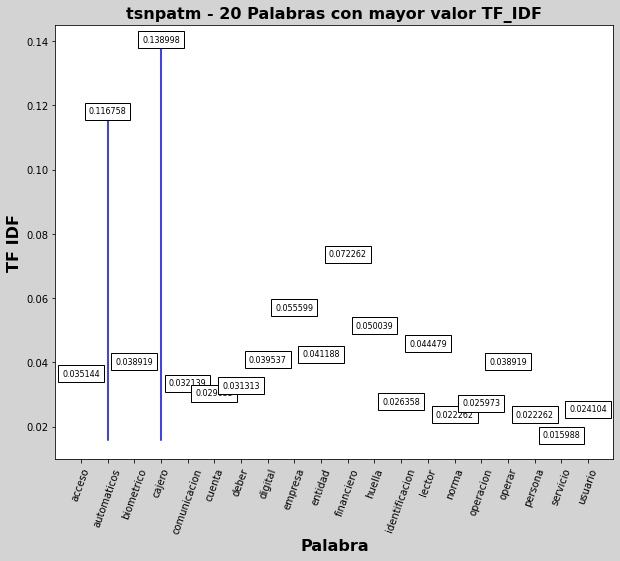

In [ ]:
#continuidad
#tsnpatm

nombres =tsnpatms['Palabra']
valores = tsnpatms['TF_IDF']
#tamaños = [20, 30, 40, 50, 60]
nombres_numeros = range(len(nombres)) # asignar un número a cada etiqueta
fig = plt.gcf()  # obtener la figura actual
fig.set_size_inches(10, 8)
fig.set_facecolor('lightgrey') 
plt.scatter(nombres_numeros, valores,color='navy', linestyle='dotted')
plt.plot([3, 3], [np.min(valores), np.max(valores)], linestyle='-', color='blue')
plt.plot([1, 1], [np.min(valores), 0.116758], linestyle='-', color='blue')

plt.xticks(nombres_numeros, nombres, rotation = 70) # agregar etiquetas en el eje x
for (xi, yi) in zip(nombres_numeros, valores):
    plt.text(xi, yi, yi, va='bottom', ha='center', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black'))
   # if (xi == 5): #or (xi == 10) or (xi == 15) :
   #   plt.text(xi, yi, yi, va='baseline', ha='right', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )
   # if (xi == 4): #or (xi == 10) or (xi == 15) :
    #  plt.text(xi, yi, yi, va='bottom', ha='left', fontsize=8 ,bbox=dict(facecolor='white', edgecolor='black') )  
plt.xlabel('Palabra', fontsize=16, fontweight='bold')
plt.ylabel('TF IDF', fontsize=16, fontweight='bold')
plt.title('tsnpatm - 20 Palabras con mayor valor TF_IDF', fontsize=16, fontweight='bold')


plt.show()

In [ ]:
dataframes_por_grupo = {}
for nombre_grupo, grupo_datos in df_palabras_impx.groupby('Archivo'):
    nuevo_df = pd.DataFrame(grupo_datos)
    # Aquí se pueder  hacer lo que quieras con el nuevo DataFrame
    # Por ejemplo, puedes guardarlo en un diccionario
    dataframes_por_grupo[nombre_grupo] = nuevo_df

In [ ]:
for dato, valor in dataframes_por_grupo.items():
  #   print(f'El valor de {dato} es {valor}')
  #  print(f'\nEl valor de {dato} es {dataframes_por_grupo[dato][0]}')
   print(f'\nEl valor de {dato} es {valor}[0]')




El valor de Dlp es     Archivo        Palabra    TF_IDF
360     Dlp        aspecto  0.060413
361     Dlp  clasificacion  0.050344
362     Dlp        control  0.043746
363     Dlp           dato  0.081243
364     Dlp     definicion  0.052996
365     Dlp            dlp  0.030207
366     Dlp     existencia  0.060475
367     Dlp    informacion  0.092917
368     Dlp      mecanismo  0.044163
369     Dlp        perdida  0.050344
370     Dlp       permitir  0.035331
371     Dlp        persona  0.033597
372     Dlp     prevencion  0.050344
373     Dlp  procedimiento  0.029101
374     Dlp        proceso  0.026878
375     Dlp      seguridad  0.023369
376     Dlp       servicio  0.016545
377     Dlp    supervision  0.030207
378     Dlp       transito  0.040275
379     Dlp        usuaria  0.044163[0]

El valor de ciberseg es       Archivo           Palabra    TF_IDF
260  ciberseg           afectar  0.036594
261  ciberseg       ciberataque  0.064039
262  ciberseg       cibernetico  0.100633
263  ci

In [ ]:
for clave in dataframes_por_grupo.keys():
  print(clave)

Dlp
ciberseg
continuidad
gestionIt
idDigital
imfs
tSNPtr
tpimf
tpusf
treqcac
treqsi
trmsist
trrci
tseguef
tsnpatm
tsnpmep
tsnppsp
tsnpspd
tsnptrnc


In [ ]:
dataframes_por_grupo.values()

dict_values([    Archivo        Palabra    TF_IDF
360     Dlp        aspecto  0.060413
361     Dlp  clasificacion  0.050344
362     Dlp        control  0.043746
363     Dlp           dato  0.081243
364     Dlp     definicion  0.052996
365     Dlp            dlp  0.030207
366     Dlp     existencia  0.060475
367     Dlp    informacion  0.092917
368     Dlp      mecanismo  0.044163
369     Dlp        perdida  0.050344
370     Dlp       permitir  0.035331
371     Dlp        persona  0.033597
372     Dlp     prevencion  0.050344
373     Dlp  procedimiento  0.029101
374     Dlp        proceso  0.026878
375     Dlp      seguridad  0.023369
376     Dlp       servicio  0.016545
377     Dlp    supervision  0.030207
378     Dlp       transito  0.040275
379     Dlp        usuaria  0.044163,       Archivo           Palabra    TF_IDF
260  ciberseg           afectar  0.036594
261  ciberseg       ciberataque  0.064039
262  ciberseg       cibernetico  0.100633
263  ciberseg  ciberresiliencia  0.082336

In [ ]:
dfTemps=[]    
for var in dir():
    if isinstance(locals()[var], pd.core.frame.DataFrame)  and (var[0] not in ['_', 'd','l','I','T','V']) :
        dfTemps.append(var)
print(type(dfTemps))
print(type(dfTemps[0]))
print("Listado de Dataframes Temporales" , dfTemps)

<class 'list'>
<class 'str'>
Listado de Dataframes Temporales ['Dlp', 'Dlps', 'ciberseg', 'continuidad', 'gestionIt', 'grupo_datos', 'idDigital', 'imfs', 'imfss', 'nuevo_df', 'valor']


In [ ]:
print(palabras_imp)

[['pago', 'tsnptrnc', 0.089274], ['transferencia', 'tsnptrnc', 0.107719], ['transferencia', 'tSNPtr', 0.097464], ['pago', 'tsnppsp', 0.139584], ['usuario', 'tpusf', 0.090528], ['imf', 'tpimf', 0.092583], ['ciberincidente', 'trrci', 0.079033], ['moneda', 'tsnpmep', 0.077165], ['operatorio', 'tsnpmep', 0.072971], ['automaticos', 'tsnpatm', 0.116758], ['cajero', 'tsnpatm', 0.138998], ['financiero', 'tsnpatm', 0.072262], ['cibernetico', 'ciberseg', 0.100633], ['ciberresiliencia', 'ciberseg', 0.082336], ['ciberseguridad', 'ciberseg', 0.082336], ['negocio', 'continuidad', 0.08184], ['caracteristico', 'idDigital', 0.089259], ['identificacion', 'idDigital', 0.070525], ['dato', 'Dlp', 0.081243], ['informacion', 'Dlp', 0.092917]]


In [ ]:
df_tf_idf_f = pd.DataFrame(ls_tf_idf, columns= colu ) 
df_tf_idf_f1 = df_tf_idf_f.groupby('Palabra')['Archivo'].value_counts()
df_tf_idf_f['Palabra'].value_counts().head(10)

entidad        14
servicio       13
deber          12
financiero     12
sistema        10
informacion     9
cuenta          7
seguridad       7
dato            6
pago            6
Name: Palabra, dtype: int64

In [ ]:
df_tf_idf_f.columns

Index(['Palabra', 'Archivo', 'TF_IDF'], dtype='object')

In [ ]:
df_tf_idf_f = df_tf_idf_f.sort_values('TF_IDF',ascending=False)
df_tf_idf_f.head(20)

,Palabra,Archivo,TF_IDF
8,pago,tsnppsp,0.139584
312,cajero,tsnpatm,0.138998
313,automaticos,tsnpatm,0.116758
0,transferencia,tsnptrnc,0.107719
322,cibernetico,ciberseg,0.100633
1,transferencia,tSNPtr,0.097464
103,informacion,Dlp,0.092917
257,imf,tpimf,0.092583
230,usuario,tpusf,0.090528
5,pago,tsnptrnc,0.089274


In [ ]:
len(palabras_imp)

20

In [ ]:
df_tf_idf_f.columns

Index(['Palabra', 'Archivo', 'TF_IDF'], dtype='object')

In [ ]:
df_tf_idf_f['TF_IDF'] = df_tf_idf_f['TF_IDF'].astype(float)


In [ ]:
df_tf_idf_f.info


<bound method DataFrame.info of               Palabra      Archivo    TF_IDF
8                pago      tsnppsp  0.139584
312            cajero      tsnpatm  0.138998
313       automaticos      tsnpatm  0.116758
0       transferencia     tsnptrnc  0.107719
322       cibernetico     ciberseg  0.100633
1       transferencia       tSNPtr  0.097464
103       informacion          Dlp  0.092917
257               imf        tpimf  0.092583
230           usuario        tpusf  0.090528
5                pago     tsnptrnc  0.089274
363    caracteristico    idDigital  0.089259
324  ciberresiliencia     ciberseg  0.082336
323    ciberseguridad     ciberseg  0.082336
339           negocio  continuidad  0.081840
168              dato          Dlp  0.081243
280    ciberincidente        trrci  0.079033
301            moneda      tsnpmep  0.077165
302        operatorio      tsnpmep  0.072971
70         financiero      tsnpatm  0.072262
321    identificacion    idDigital  0.070525
177         seguridad  

In [ ]:
print(df_tf_idf_f.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 8 to 26
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Palabra  380 non-null    object 
 1   Archivo  380 non-null    object 
 2   TF_IDF   380 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.9+ KB
None


In [ ]:

df_palabras = pd.DataFrame(palabras_imp, columns= colu ) 
df_palabras.sort_values('TF_IDF',ascending=False)

,Palabra,Archivo,TF_IDF
3,pago,tsnppsp,0.139584
10,cajero,tsnpatm,0.138998
9,automaticos,tsnpatm,0.116758
1,transferencia,tsnptrnc,0.107719
12,cibernetico,ciberseg,0.100633
2,transferencia,tSNPtr,0.097464
19,informacion,Dlp,0.092917
5,imf,tpimf,0.092583
4,usuario,tpusf,0.090528
0,pago,tsnptrnc,0.089274
